In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#Leer Df
df = pd.read_csv("C:/Users/santi/Downloads/Evaluación anova factorial - Hoja 2.csv")
print(df.columns)

Index(['Unnamed: 0', 'Estrategia A Niños', 'Estrategia A Niñas',
       'Estrategia B Niños', 'Estrategia B Niñas', 'Estrategia C Niños',
       'Estrategia C Niñas'],
      dtype='object')


In [3]:
#Eliminar la primero columna porque está vacía
if df.iloc[:, 0].isnull().all():
    df = df.drop(df.columns[0], axis=1)

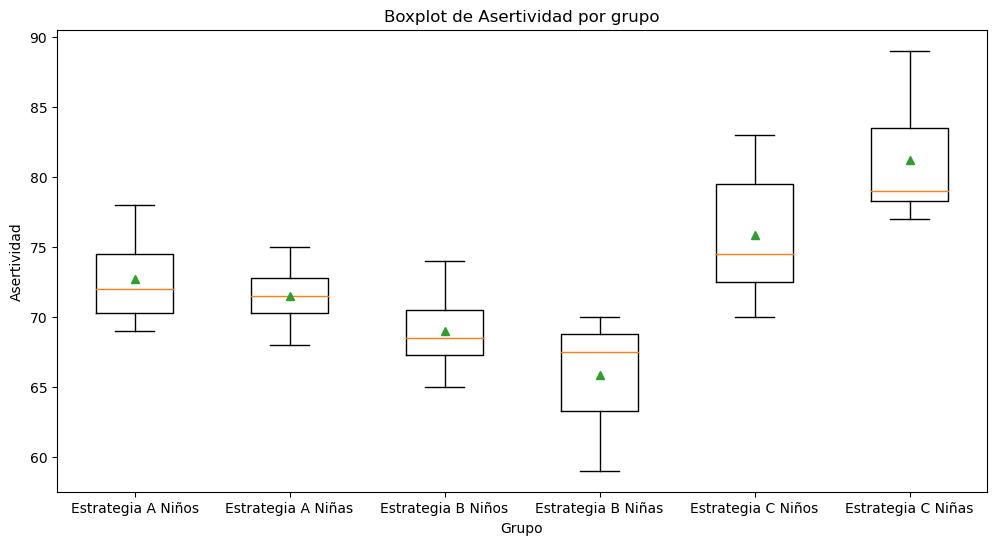

In [4]:
# Diagrama de caja y bigotes
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot([df[group] for group in df.columns], showmeans=True)
# Customize the plot
ax.set_title('Boxplot de Asertividad por grupo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Asertividad')
ax.set_xticklabels(df.columns)

# Show the plot
plt.show()



In [5]:
#Pruebas para determinar si el ANOVA tiene validez
# Test normality for each group
for group in df.columns:
    _, p_value = stats.shapiro(df[group].dropna())
    print(f"Shapiro-Wilk Test for {group}: p-value = {p_value:.4f}")

Shapiro-Wilk Test for Estrategia A Niños: p-value = 0.7124
Shapiro-Wilk Test for Estrategia A Niñas: p-value = 1.0000
Shapiro-Wilk Test for Estrategia B Niños: p-value = 0.9485
Shapiro-Wilk Test for Estrategia B Niñas: p-value = 0.2609
Shapiro-Wilk Test for Estrategia C Niños: p-value = 0.5079
Shapiro-Wilk Test for Estrategia C Niñas: p-value = 0.1087


In [7]:
# Test homogeneity of variances using Levene's test
_, p_value = stats.levene(*[df[group].dropna() for group in df.columns])
print(f"Levene's Test: p-value = {p_value:.4f}")

Levene's Test: p-value = 0.8520


In [10]:
#ANOVA Factorial
#Datos en el formato correcto
data = pd.read_csv("C:/Users/santi/Downloads/Evaluación anova factorial - Hoja 3.csv")

# Assuming your data now has three columns: 'sex', 'group', and 'assertiveness'
# Fit the model
model = ols('asertividad ~ C(sexo) * C(grupo)', data=data).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the results
print(anova_table)



                      sum_sq    df          F    PR(>F)
C(sexo)            31.778816   1.0   1.952435  0.172574
C(grupo)          440.303584   2.0  13.525739  0.000065
C(sexo):C(grupo)    7.425946   2.0   0.228119  0.797398
Residual          488.295238  30.0        NaN       NaN


In [15]:
tukey_results = pairwise_tukeyhsd(data['asertividad'].dropna(),
                                   data['grupo'].dropna(),
                                   alpha=0.05)
print(tukey_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Estrategia A Estrategia B  -4.6667 0.0195 -8.6718 -0.6615   True
Estrategia A Estrategia C     3.75 0.0702 -0.2551  7.7551  False
Estrategia B Estrategia C   8.4167    0.0  4.4115 12.4218   True
----------------------------------------------------------------
